In [15]:
import porespy as ps
import openpnm as op
import numpy as np

from phase_contrast_restoration import get_img as get_bin_img
import file_paths
import matplotlib.pyplot as plt
import data_manager as dm

from skimage.measure import marching_cubes

In [2]:
polimer_type = ["PDL-05", "PDLG-5002"][0]
sample_id = 1

paths = file_paths.get_benchtop_setup_paths(polimer_type)
sample_name = list(paths.keys())[sample_id]

img3d = get_bin_img(sample_name)

In [3]:
snow = ps.networks.snow(im=img3d, boundary_faces=['right'])
proj = op.io.PoreSpy.import_data(snow)
print(proj)
net = proj[0]

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  1365
Peaks after trimming saddle points:  1110
Peaks after trimming nearby peaks:  1027
------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████| 1078/1078 [01:44<00:00, 10.34it/s]
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 Object Name     Object ID                                                        
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 net_01          <openpnm.network.GenericNetwork object at 0x7fedf9f0bfb0>        
 geo_01          <openpnm.geometry.Imported object at 0x7fedf9e35590>             
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


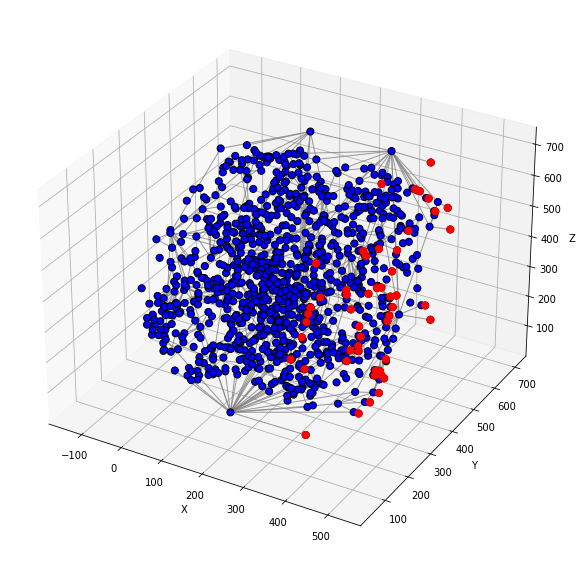

In [4]:

fig = op.topotools.plot_connections(network=net, alpha=0.8, color='grey')
fig = op.topotools.plot_coordinates(network=net, fig=fig, color='b', edgecolor='k', markersize=50)
fig = op.topotools.plot_coordinates(network=net, pores=net.pores('right'), fig=fig, color='r', markersize=50)
fig.set_size_inches(8, 8)
fig.tight_layout()

In [9]:
pore_diameters = proj[1]['pore.diameter']

In [16]:
np.mean(pore_diameters*9)

284.0239326250575

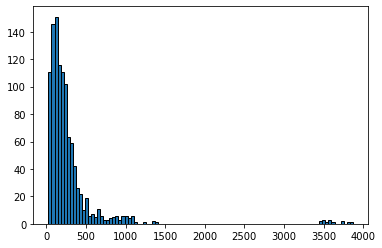

In [17]:
_=plt.hist(pore_diameters*9, bins=100, edgecolor='k')